<a href="https://colab.research.google.com/github/AtifQureshi110/ML/blob/main/SVM_exams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **libraries**

In [2]:
#hide earrings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#plt.style.use('seaborn')

## **Data**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/BERT/Transformers/Selceted for interview/ML/svm_exams.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [ ]:
# Get the 'gender' column
gender_column = df.pop('gender')

# Insert the 'gender' column at the end
df['gender'] = gender_column

In [ ]:
df

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender
0,group A,high school,standard,completed,67,67,63,male
1,group D,some high school,free/reduced,none,40,59,55,female
2,group E,some college,free/reduced,none,59,60,50,male
3,group B,high school,standard,none,77,78,68,male
4,group E,associate's degree,standard,completed,78,73,68,male
...,...,...,...,...,...,...,...,...
995,group C,high school,standard,none,73,70,65,male
996,group D,associate's degree,free/reduced,completed,85,91,92,male
997,group C,some high school,free/reduced,none,32,35,41,female
998,group C,some college,standard,none,73,74,82,female


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   race/ethnicity               1000 non-null   object
 1   parental level of education  1000 non-null   object
 2   lunch                        1000 non-null   object
 3   test preparation course      1000 non-null   object
 4   math score                   1000 non-null   int64 
 5   reading score                1000 non-null   int64 
 6   writing score                1000 non-null   int64 
 7   gender                       1000 non-null   object
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
def modify_dataframe_columns(df):
    # Modify the column names
    modified_columns = [col.replace(' ', '_').replace('/', '_') for col in df.columns]
    df.columns = modified_columns
modify_dataframe_columns(df)

In [ ]:
df.test_preparation_course.replace('none','uncomplete',inplace=True)

In [ ]:
df.head(5)

,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,gender
0,group A,high school,standard,completed,67,67,63,male
1,group D,some high school,free/reduced,uncomplete,40,59,55,female
2,group E,some college,free/reduced,uncomplete,59,60,50,male
3,group B,high school,standard,uncomplete,77,78,68,male
4,group E,associate's degree,standard,completed,78,73,68,male


In [ ]:
def get_unique_and_value_count(c_ids):
    dic = {}
    for c_id in c_ids:
        unique_values = df[c_id].unique().tolist() # remove dtype=object) from answer
        value_counts = df[c_id].value_counts()
        dic[c_id] = {"unique": unique_values, "value_counts": value_counts.to_dict()}
    return dic

result = get_unique_and_value_count(df.columns[0:5])
for key,value in result.items():
  print(key,"\n", value,"\n")

race_ethnicity 
 {'unique': ['group A', 'group D', 'group E', 'group B', 'group C'], 'value_counts': {'group C': 323, 'group D': 262, 'group B': 205, 'group E': 131, 'group A': 79}} 

parental_level_of_education 
 {'unique': ['high school', 'some high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"], 'value_counts': {'some college': 222, "associate's degree": 203, 'high school': 202, 'some high school': 191, "bachelor's degree": 112, "master's degree": 70}} 

lunch 
 {'unique': ['standard', 'free/reduced'], 'value_counts': {'standard': 652, 'free/reduced': 348}} 

test_preparation_course 
 {'unique': ['completed', 'uncomplete'], 'value_counts': {'uncomplete': 665, 'completed': 335}} 

math_score 
 {'unique': [67, 40, 59, 77, 78, 63, 62, 93, 47, 99, 80, 74, 81, 69, 58, 54, 23, 39, 83, 71, 44, 46, 51, 53, 33, 87, 65, 79, 68, 57, 98, 100, 60, 64, 52, 36, 56, 88, 42, 76, 49, 72, 31, 32, 97, 94, 95, 45, 75, 66, 70, 82, 92, 30, 41, 43, 55, 73, 48, 86, 84

##### the pairplot shows that the ratio of male is gearter than felmale meanwhile it also highlight that columns have direct relation between them  

In [ ]:
print('total number gender in exam',+len(df.index))

total number gender in exam 1000


In [ ]:
def get_percentage_of_col(col_id, mas1 = "Percentage of female in exam: ",
                                mas2 = "Percentage of male in exam: "):
    zero = len(df[df[col_id] == "female"])
    one = len(df[df[col_id] == 'male'])
    print(mas1 , "{:.2f}%".format((zero / (len(df[col_id]))*100)))
    print(mas2 , "{:.2f}%".format((one / (len(df[col_id]))*100)))

In [ ]:
get_percentage_of_col('gender')

Percentage of female in exam:  48.30%
Percentage of male in exam:  51.70%


## visualiziation

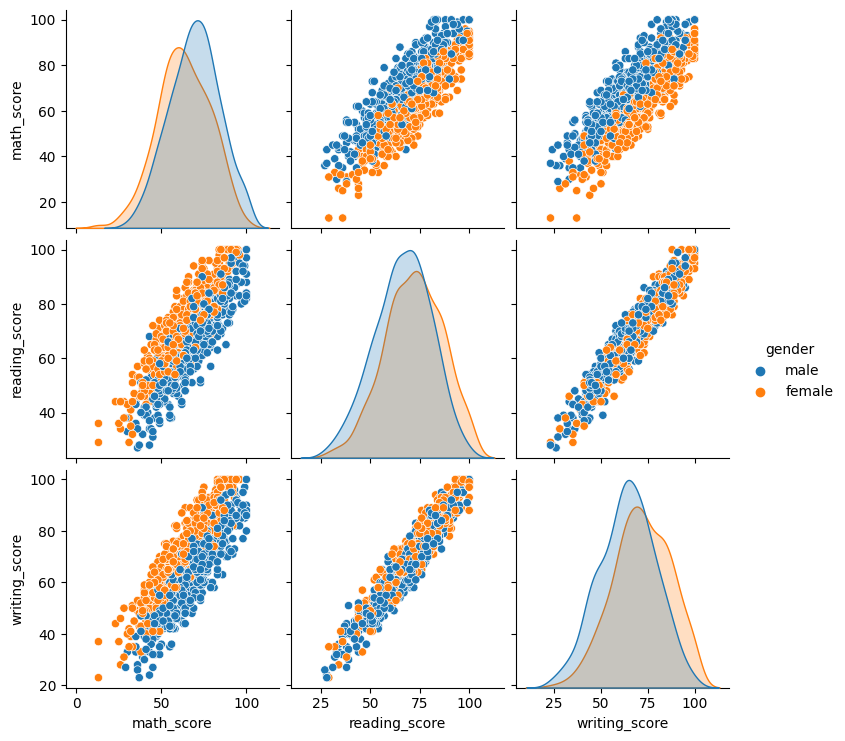

In [ ]:
def get_pair_plot(df_id,hue_id):
    sns.pairplot(data= df_id,hue=hue_id)
    plt.show()
get_pair_plot(df,"gender")

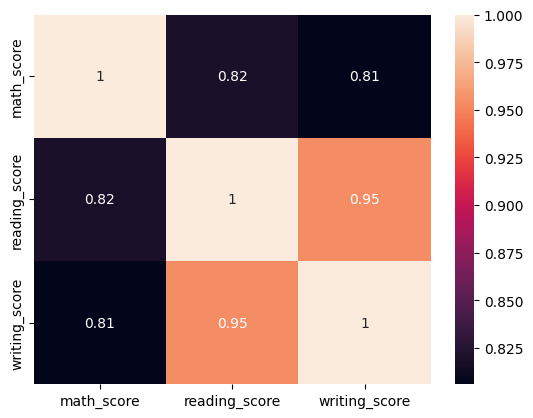

In [ ]:
def get_heatmap(df_id):
    """
    heatmap show the relation b/w variables on each axis.
    the Correlation ranges from -1 to +1.
    Values closer to zero means there is no linear trend between the two variables.
    The close to 1 the correlation is the more positively correlated they are;
    that is, as one increases so does the other and the closer to 1 the stronger this relationship is.
    the square's colors also show the relationship such as lighter colors have (more or some) correlation but,
    darker color (less or no) correlation b/w them
    """
    sns.heatmap(df_id.corr(),annot=True)
get_heatmap(df)

<Axes: >

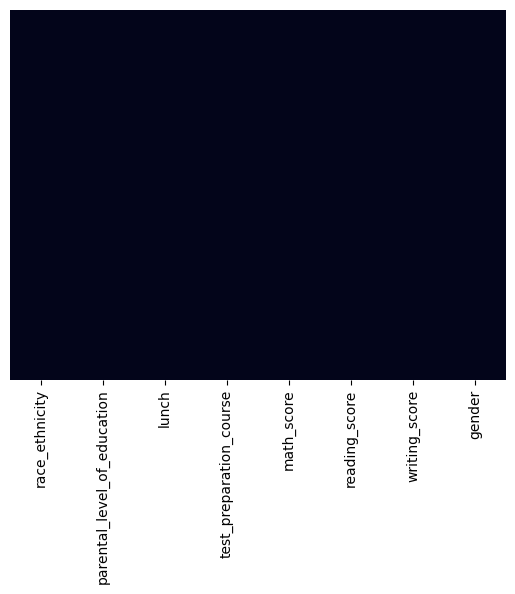

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)
#if it would have some null value so it show some color otherwise it is completly black

In [ ]:
df.head(2)

,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,gender
0,group A,high school,standard,completed,67,67,63,male
1,group D,some high school,free/reduced,uncomplete,40,59,55,female


In [ ]:
def get_group_cols(col_id):
    return df.groupby([col_id]).mean()
    # it group all the col by one particular col 'value. such as,col name == target  (0,1)
get_group_cols('race_ethnicity')
#female got high score in reading and writing score as compare to male, however male score of maths is higher in maths

,math_score,reading_score,writing_score
race_ethnicity,,,
group A,65.215190,68.556962,66.974684
group B,63.170732,67.102439,65.736585
group C,63.130031,66.383901,64.523220
group D,69.267176,72.087786,72.259542
group E,74.465649,72.526718,70.213740


In [ ]:
df[df['gender'] == 'male']

,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,gender
0,group A,high school,standard,completed,67,67,63,male
2,group E,some college,free/reduced,uncomplete,59,60,50,male
3,group B,high school,standard,uncomplete,77,78,68,male
4,group E,associate's degree,standard,completed,78,73,68,male
7,group E,some college,standard,completed,93,88,84,male
...,...,...,...,...,...,...,...,...
992,group C,some college,standard,uncomplete,69,63,66,male
994,group E,high school,free/reduced,completed,86,82,75,male
995,group C,high school,standard,uncomplete,73,70,65,male
996,group D,associate's degree,free/reduced,completed,85,91,92,male


In [ ]:
def get_crosstab(col_id1, col_id2):
    """The crosstab basically take all unique value of col_one and seprate the value
    of other col according to col_one and tell how times they occure"""
    return pd.crosstab(df[col_id1],df[col_id2])

In [ ]:
get_crosstab('race_ethnicity',"gender")

gender,female,male
race_ethnicity,,
group A,37,42
group B,114,91
group C,154,169
group D,126,136
group E,52,79


In [ ]:
df[(df['race_ethnicity']=='group A')]

,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,gender
0,group A,high school,standard,completed,67,67,63,male
6,group A,bachelor's degree,standard,uncomplete,62,59,63,female
29,group A,some high school,free/reduced,uncomplete,33,54,51,female
31,group A,bachelor's degree,free/reduced,uncomplete,78,74,73,male
32,group A,some high school,free/reduced,completed,40,41,39,male
...,...,...,...,...,...,...,...,...
966,group A,some high school,free/reduced,completed,55,73,70,female
983,group A,some high school,standard,uncomplete,58,50,47,male
987,group A,some college,standard,completed,78,78,74,male
993,group A,associate's degree,standard,uncomplete,58,54,58,female


In [ ]:
def get_crosstab_plot(col_id1, col_id2, title, xlabel, ylabel, figsize=(20,6),angel=0,col1='#000000',col2='#5F9EA0'):
    pd.crosstab(df[col_id1],df[col_id2]).plot(kind="bar",figsize=figsize,color=[col1,col2])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=angel)
    plt.savefig('exam.png')
    plt.legend(["female","male"])
    plt.show()

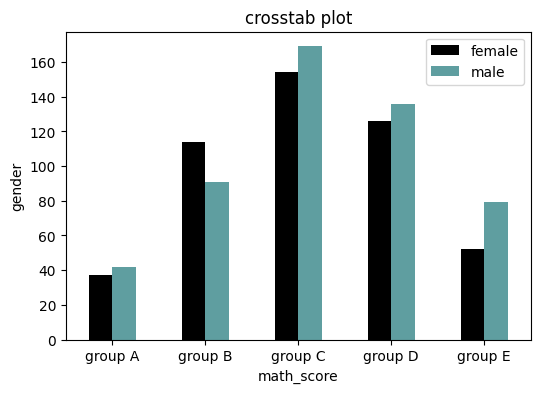

In [ ]:
get_crosstab_plot("race_ethnicity","gender","crosstab plot","math_score","gender",figsize=(6,4))

In [ ]:
get_crosstab('gender','parental_level_of_education')

parental_level_of_education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
gender,,,,,,
female,81,58,94,42,100,108
male,122,54,108,28,122,83


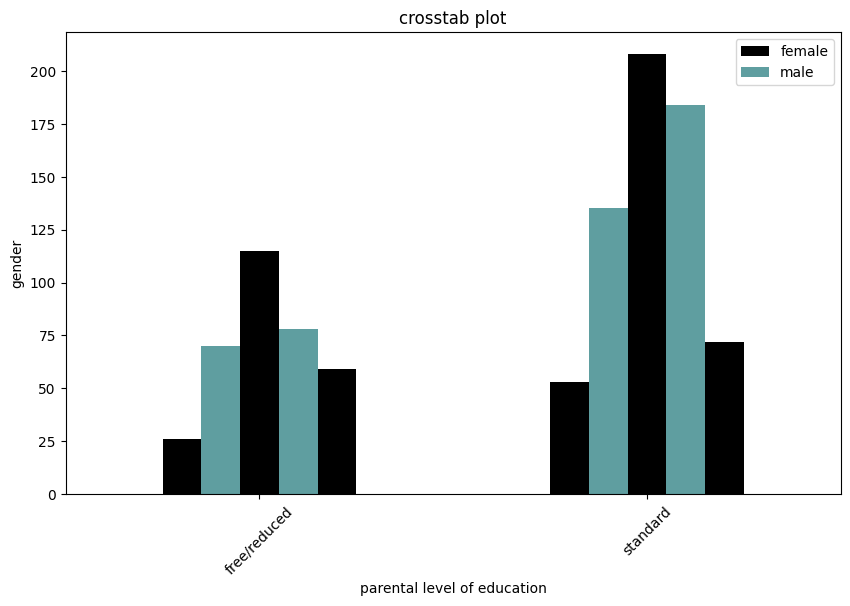

In [ ]:
get_crosstab_plot(df.columns[2],df.columns[0],"crosstab plot","parental level of education","gender",figsize=(10,6),angel=45)

In [ ]:
get_crosstab('gender','lunch')

lunch,free/reduced,standard
gender,,
female,160,323
male,188,329


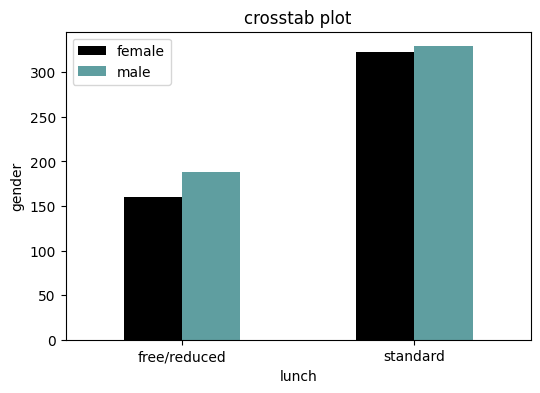

In [ ]:
get_crosstab_plot("lunch","gender","crosstab plot","lunch","gender",figsize=(6,4))

In [ ]:
get_crosstab('gender','test_preparation_course')

test_preparation_course,completed,uncomplete
gender,,
female,160,323
male,175,342


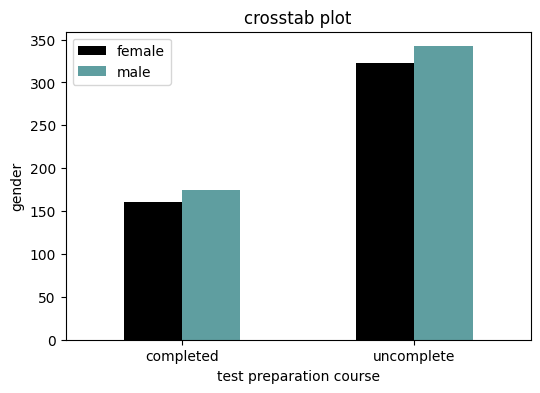

In [ ]:
get_crosstab_plot("test_preparation_course","gender","crosstab plot","test preparation course","gender",figsize=(6,4))

In [ ]:
get_crosstab('gender','math_score')

math_score,13,23,25,26,28,29,30,31,32,33,...,91,92,93,94,95,96,97,98,99,100
gender,,,,,,,,,,,,,,,,,,,,,
female,2,1,1,2,2,0,1,2,2,4,...,3,5,1,2,1,1,0,0,0,3
male,0,0,0,0,0,1,1,0,0,0,...,5,2,4,5,1,2,3,3,3,11


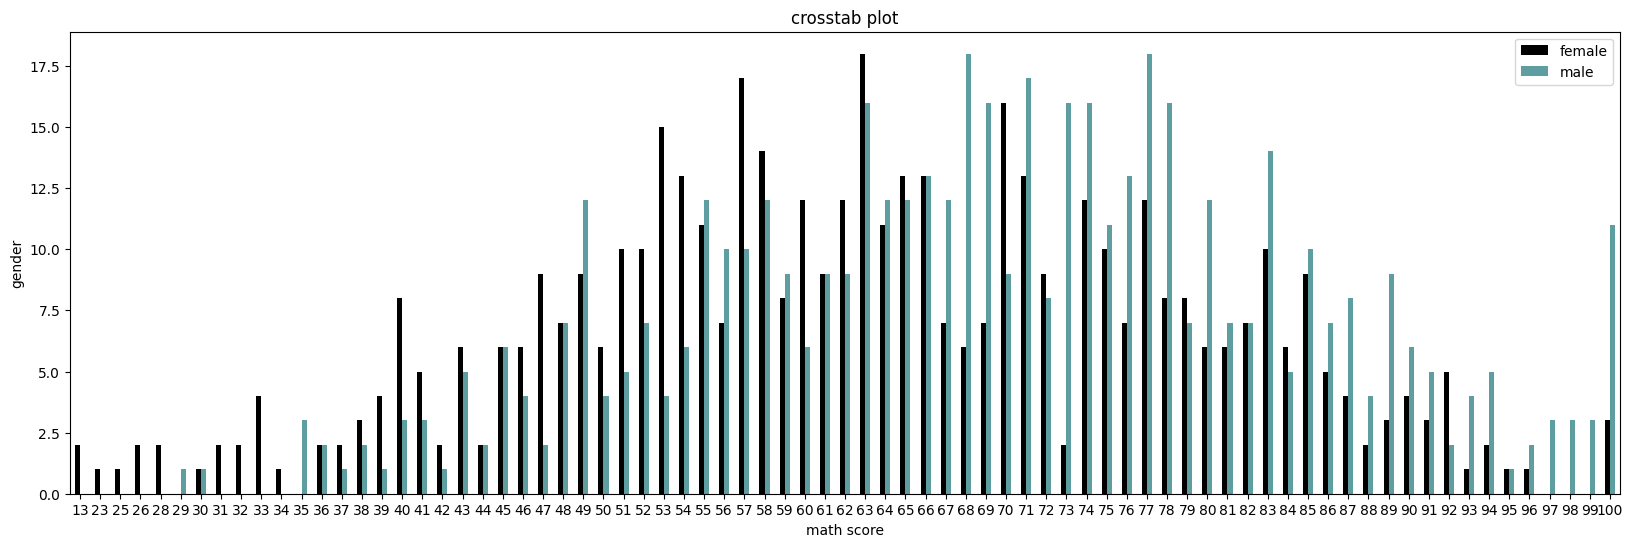

In [ ]:
get_crosstab_plot("math_score","gender","crosstab plot","math score","gender",figsize=(20,6))

In [ ]:
get_crosstab('gender','writing_score')

writing_score,23,24,26,27,28,30,31,32,33,34,...,91,92,93,94,95,96,97,98,99,100
gender,,,,,,,,,,,,,,,,,,,,,
female,1,0,0,0,1,0,1,0,1,0,...,2,6,8,4,4,2,7,1,3,15
male,1,1,1,2,1,1,1,3,3,1,...,2,2,2,1,3,1,2,0,0,3


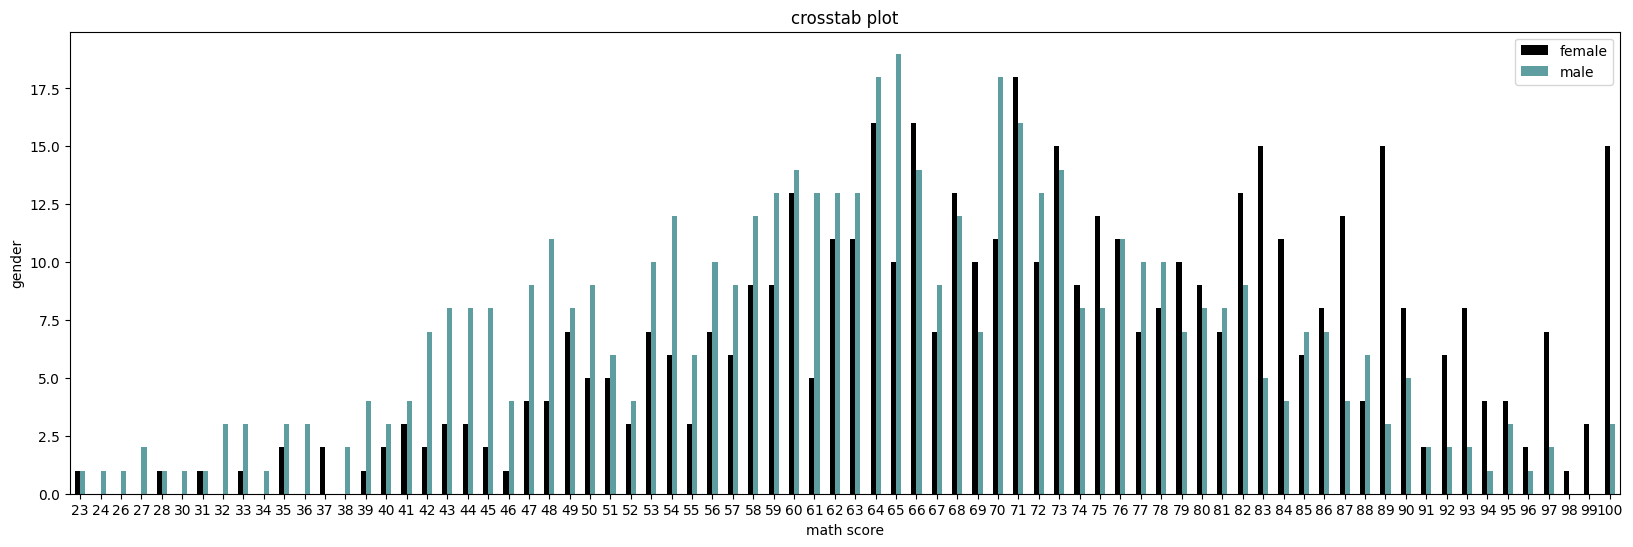

In [ ]:
get_crosstab_plot("writing_score","gender","crosstab plot","math score","gender",figsize=(20,6))

In [ ]:
get_crosstab('gender','reading_score')

reading_score,27,28,29,31,32,33,34,35,36,37,...,91,92,93,94,95,96,97,98,99,100
gender,,,,,,,,,,,,,,,,,,,,,
female,0,0,2,0,1,0,1,1,2,0,...,6,3,6,2,7,3,1,2,1,17
male,1,2,0,1,1,2,3,0,2,2,...,4,4,2,2,2,1,2,0,1,2


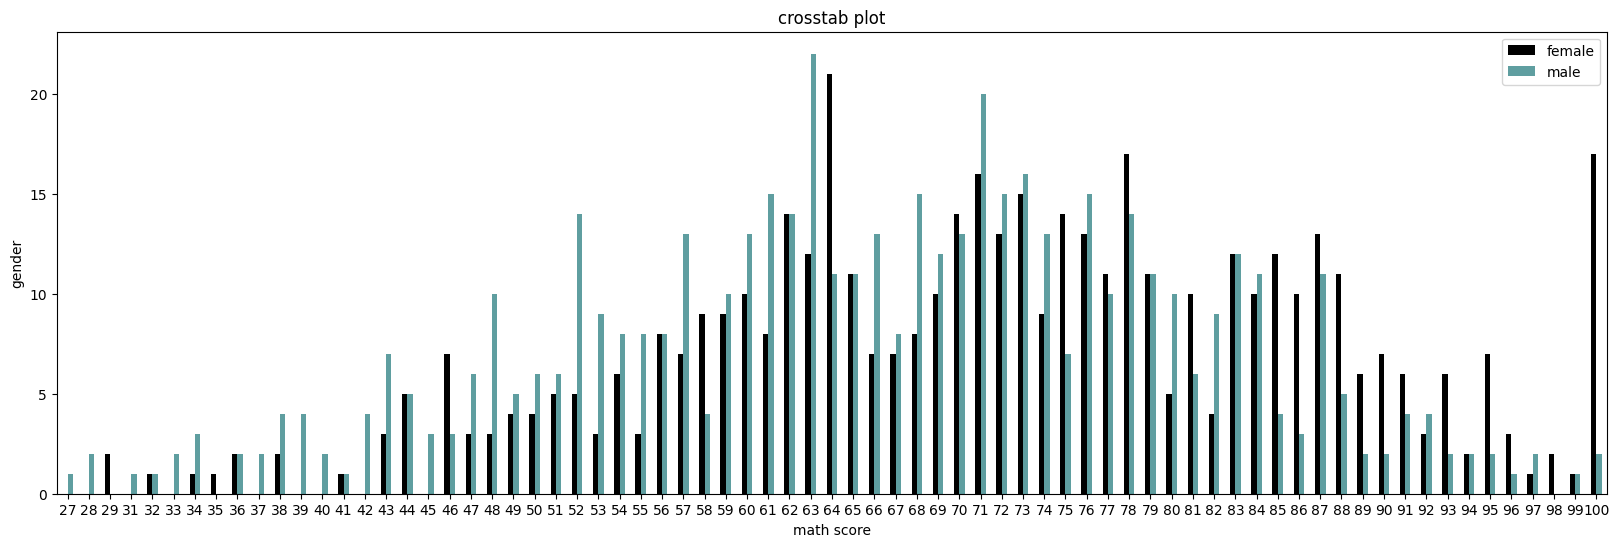

In [ ]:
get_crosstab_plot("reading_score","gender","crosstab plot","math score","gender",figsize=(20,6))

In [ ]:
df.drop(['race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'], axis=1, inplace = True)

In [ ]:
df

,math_score,reading_score,writing_score,gender
0,67,67,63,male
1,40,59,55,female
2,59,60,50,male
3,77,78,68,male
4,78,73,68,male
...,...,...,...,...
995,73,70,65,male
996,85,91,92,male
997,32,35,41,female
998,73,74,82,female


## Modelling

In [ ]:
!pip install mlxtend -q

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC #Import svm model
from mlxtend.plotting import plot_confusion_matrix

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#plot_confusion_matrix

In [ ]:
def get_labed_encoder(col_ids_list):
    global new_df
    for col_id_list in col_ids_list:
        df[col_id_list] = df[col_id_list].apply(LabelEncoder().fit_transform)
        new_df = df.copy()
get_labed_encoder([['gender']])

In [ ]:
new_df

,math_score,reading_score,writing_score,gender
0,67,67,63,1
1,40,59,55,0
2,59,60,50,1
3,77,78,68,1
4,78,73,68,1
...,...,...,...,...
995,73,70,65,1
996,85,91,92,1
997,32,35,41,0
998,73,74,82,0


In [ ]:
#Separate Feature and Target Matrix
def get_seprate_features(df_id,col_id):
    #col_id is special col or target col b/c this the whole model is going to be created
    global X, y
    X = df_id.drop(col_id,axis = 1)
    y = df_id[col_id]
get_seprate_features(df,'gender')

In [ ]:
X

,math_score,reading_score,writing_score
0,67,67,63
1,40,59,55
2,59,60,50
3,77,78,68
4,78,73,68
...,...,...,...
995,73,70,65
996,85,91,92
997,32,35,41
998,73,74,82


In [ ]:
from sklearn.preprocessing import StandardScaler
# Create an instance of StandardScaler
scaler = StandardScaler()

In [ ]:
# Fit the scaler to your data and transform it
X = scaler.fit_transform(X)
X

array([[ 0.03923309, -0.13591401, -0.30385073],
       [-1.714564  , -0.67902695, -0.81689543],
       [-0.48041049, -0.61113783, -1.13754838],
       ...,
       [-2.23420758, -2.30836575, -1.71472367],
       [ 0.42896578,  0.33930981,  0.91463045],
       [-0.0906778 , -0.61113783, -0.36798132]])

In [ ]:
y

0      1
1      0
2      1
3      1
4      1
      ..
995    1
996    1
997    0
998    0
999    1
Name: gender, Length: 1000, dtype: int64

In [ ]:
def get_train_test_split(array1, array2, test_size, random_state):
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split(array1, array2, test_size=test_size,random_state=random_state)
get_train_test_split(X,y,0.3,1)

In [ ]:
model_svm = SVC()
def get_model_fit(X_train_id, y_train_id,model_id):
    #model.fit(only take train variables of X and  y)
    accuracies = {}
    model_id.fit(X_train_id,y_train_id)
    train_accuracy = model_id.score(X_train_id,y_train_id)*100
    accuracies[model_id] = train_accuracy
    print("Accuracy for our training dataset with (SVC) tuning is : {:.2f}%".format(train_accuracy) )
    #return accuracies
get_model_fit(X_train, y_train, model_svm)

Accuracy for our training dataset with (SVC) tuning is : 86.00%


In [ ]:
def get_test_accuracy_score(model):
    global y_pred
    y_pred = model.predict(X_test)
    test_accuracy=accuracy_score(y_test,y_pred)*100
    test_accuracy
    print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy))
get_test_accuracy_score(model_svm)

Accuracy for our testing dataset with tuning is : 84.00%


In [ ]:
def get_classification_report(y_t, y_p):
    return print(classification_report(y_t, y_p))
get_classification_report(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       145
           1       0.82      0.88      0.85       155

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [ ]:
def get_confusion_matrix_plot(y_t, y_p, model_id):
    cm = confusion_matrix(y_t,y_p)
    #disp = ConfusionMatrixDisplay(model_id, X_test, y_test)#,cmap=plt.cm.gray)
    print("0 = female and 1 = male")
    plt.show()
    return 'This is the confusion metrix: ',(cm)
get_confusion_matrix_plot(y_test,y_pred,model_svm)



0 = female and 1 = male


('This is the confusion metrix: ',
 array([[116,  29],
        [ 19, 136]]))

In [ ]:
# Make predictions on the test data
predictions = loaded_model.predict(X_test)

# Create a new DataFrame to store the results
results_df = pd.DataFrame({'Predicted_Gender': predictions})

# You can also concatenate the results with the original test_data DataFrame if needed
# results_df = pd.concat([test_data, results_df], axis=1)

# Print or save the results DataFrame
results_df

,Predicted_Gender
0,0
1,0
2,0
3,0
4,1
...,...
295,0
296,1
297,1
298,1


In [ ]:
y_test

507    0
818    0
452    0
368    0
242    1
      ..
459    1
415    1
61     0
347    1
349    0
Name: gender, Length: 300, dtype: int64

In [ ]:
# Get the indices of X_test
test_indices = np.arange(len(X_train), len(X_train) + len(X_test))

In [ ]:
selected_data = new_df.iloc[test_indices]

In [ ]:
selected_data.reset_index(drop=True, inplace=True)
selected_data

,math_score,reading_score,writing_score,gender
0,41,39,34,1
1,43,37,43,1
2,85,70,71,1
3,71,72,69,1
4,72,70,72,0
...,...,...,...,...
295,73,70,65,1
296,85,91,92,1
297,32,35,41,0
298,73,74,82,0


In [ ]:

# Concatenate the two dataframes
concatenated_df = pd.concat([selected_data, results_df], axis=1)
concatenated_df

,math_score,reading_score,writing_score,gender,Predicted_Gender
0,41,39,34,1,0
1,43,37,43,1,0
2,85,70,71,1,0
3,71,72,69,1,0
4,72,70,72,0,1
...,...,...,...,...,...
295,73,70,65,1,0
296,85,91,92,1,1
297,32,35,41,0,1
298,73,74,82,0,1


In [ ]:
concatenated_df[concatenated_df.gender != concatenated_df.Predicted_Gender]

,math_score,reading_score,writing_score,gender,Predicted_Gender
0,41,39,34,1,0
1,43,37,43,1,0
2,85,70,71,1,0
3,71,72,69,1,0
4,72,70,72,0,1
...,...,...,...,...,...
292,69,63,66,1,0
295,73,70,65,1,0
297,32,35,41,0,1
298,73,74,82,0,1


In [ ]:
concatenated_df[concatenated_df.Predicted_Gender==1]

,math_score,reading_score,writing_score,gender,Predicted_Gender
4,72,70,72,0,1
6,89,100,100,0,1
7,92,86,82,0,1
9,80,70,60,1,1
10,56,64,59,0,1
...,...,...,...,...,...
290,67,55,53,1,1
294,86,82,75,1,1
296,85,91,92,1,1
297,32,35,41,0,1


#save and deploy the model

In [ ]:
!pip install joblib -q

In [ ]:
import joblib

# Save your model to a file
joblib.dump(model_svm, 'model_filename.pkl')


['model_filename.pkl']

In [ ]:
input_data = {
    'math_score': 72,      # Replace with the actual math score
    'reading_score': 70,   # Replace with the actual reading score
    'writing_score': 72    # Replace with the actual writing score
}

In [ ]:
# Convert the input data to a list of values in the same order as your model expects
input_values = [input_data['math_score'], input_data['reading_score'], input_data['writing_score']]

# Make a prediction
predicted_gender = loaded_model.predict([input_values])[0]


In [ ]:
gender_mapping = {0: 'female', 1: 'male'}

In [ ]:
predicted_gender_label = gender_mapping[predicted_gender]
predicted_gender_label

'female'